<a href="https://colab.research.google.com/github/malevashov/data-visualization-course-tsu/blob/main/Project1_Iris_dataset_Michael_Levashov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  PROJECT 1 - Michael Levashov

## The Fisher’s Iris dataset consists of 50 samples from each of three species of Iris (setosa, virginica and versicolor). To simplify the project, just use the data for setosa and versicolor species. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In [ ]:
#include all the modules here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [ ]:
#To import the Iris dataset:
# the iris dataset is now a Pandas DataFrame
iris_data = pd.read_csv("iris_data.csv")
#To view Iris data below:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


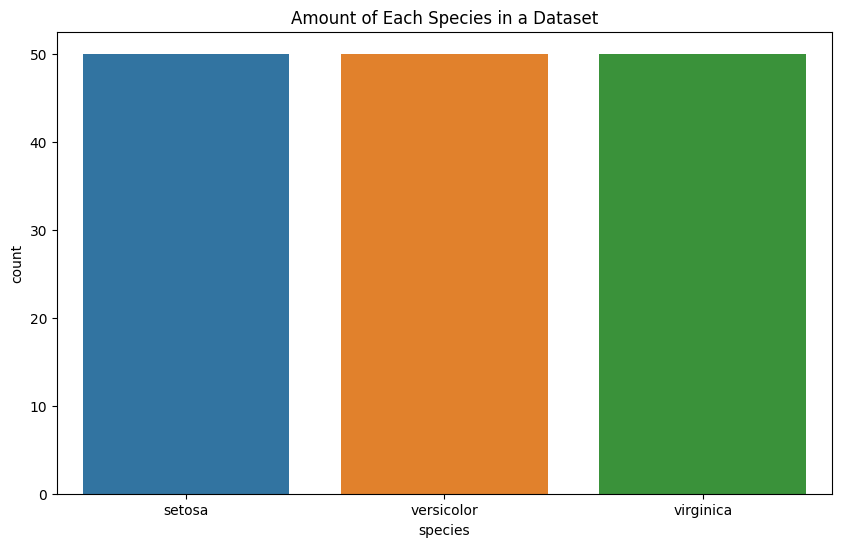

In [ ]:
# Show samples from each species

plt.rcParams['figure.figsize'] = [10,6]

sns.countplot(x = 'species', data = iris_data).set_title("Amount of Each Species in a Dataset")
plt.show()

In [ ]:
iris_data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
# Create a dataframe for only setosa and versicolor

setosa_versicolor = iris_data[(iris_data.species == 'setosa') | (iris_data.species == 'versicolor')]

print(setosa_versicolor)

    sepal_length  sepal_width  petal_length  petal_width     species
0            5.1          3.5           1.4          0.2      setosa
1            4.9          3.0           1.4          0.2      setosa
2            4.7          3.2           1.3          0.2      setosa
3            4.6          3.1           1.5          0.2      setosa
4            5.0          3.6           1.4          0.2      setosa
..           ...          ...           ...          ...         ...
95           5.7          3.0           4.2          1.2  versicolor
96           5.7          2.9           4.2          1.3  versicolor
97           6.2          2.9           4.3          1.3  versicolor
98           5.1          2.5           3.0          1.1  versicolor
99           5.7          2.8           4.1          1.3  versicolor

[100 rows x 5 columns]


Show pairwise relationships in this dataset using seaborn's pairplot

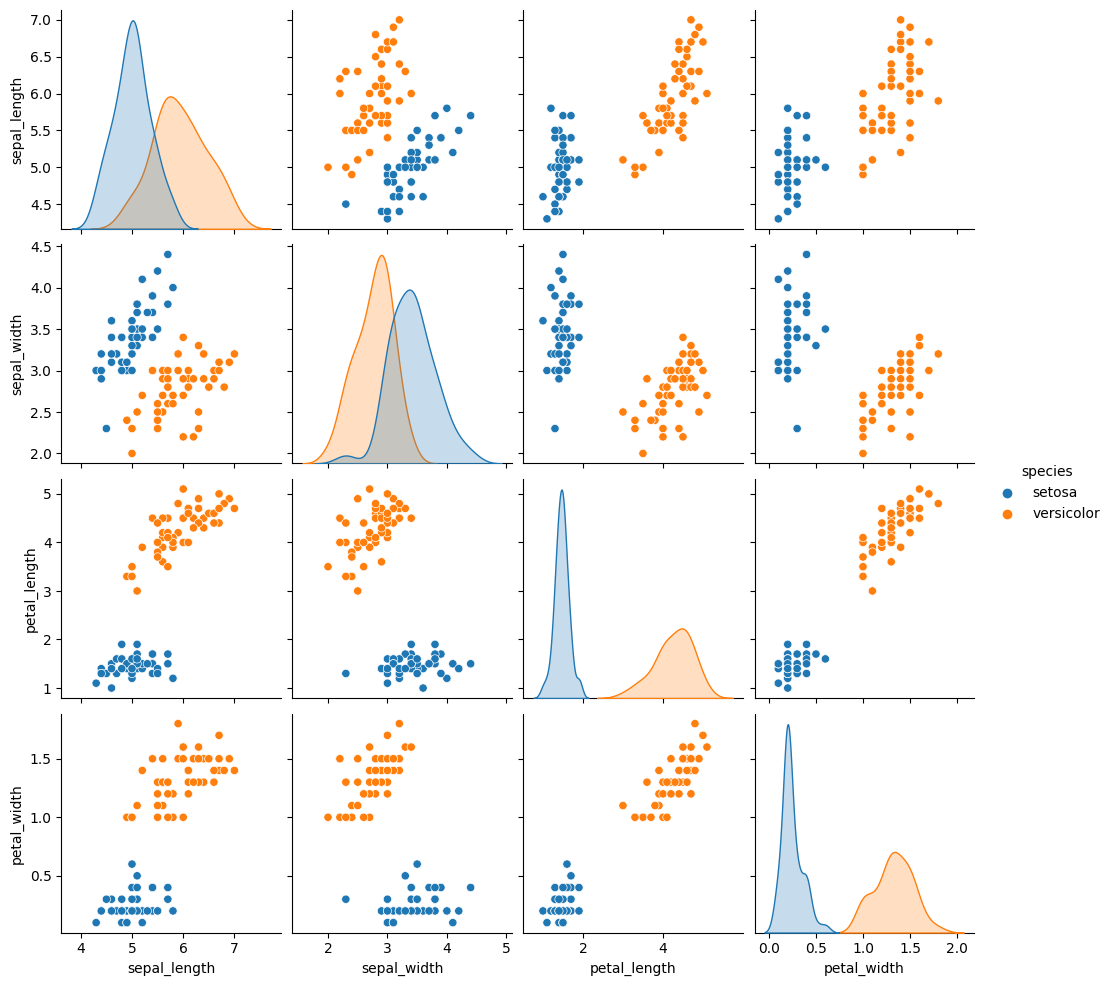

In [ ]:
plt.rcParams['figure.figsize'] = [8,6]

sns.pairplot(data = setosa_versicolor, hue = 'species')

### choose 2 with the highest distance  petal_lenght vs. petal_width and petal_length and sepal_width

choose 2 with the highest distance  petal_lenght vs. petal_width and petal_length and sepal_width
draw a subplot for two figures such as:
1) petal_lenght vs. petal_width
2) petal_length and sepal_width
find the means of each specimens in each graph and calculate the distance between the means and draw a line
with a text showing the distance use plt.text

Text(2.5, 3.2, '2.870108011904778')

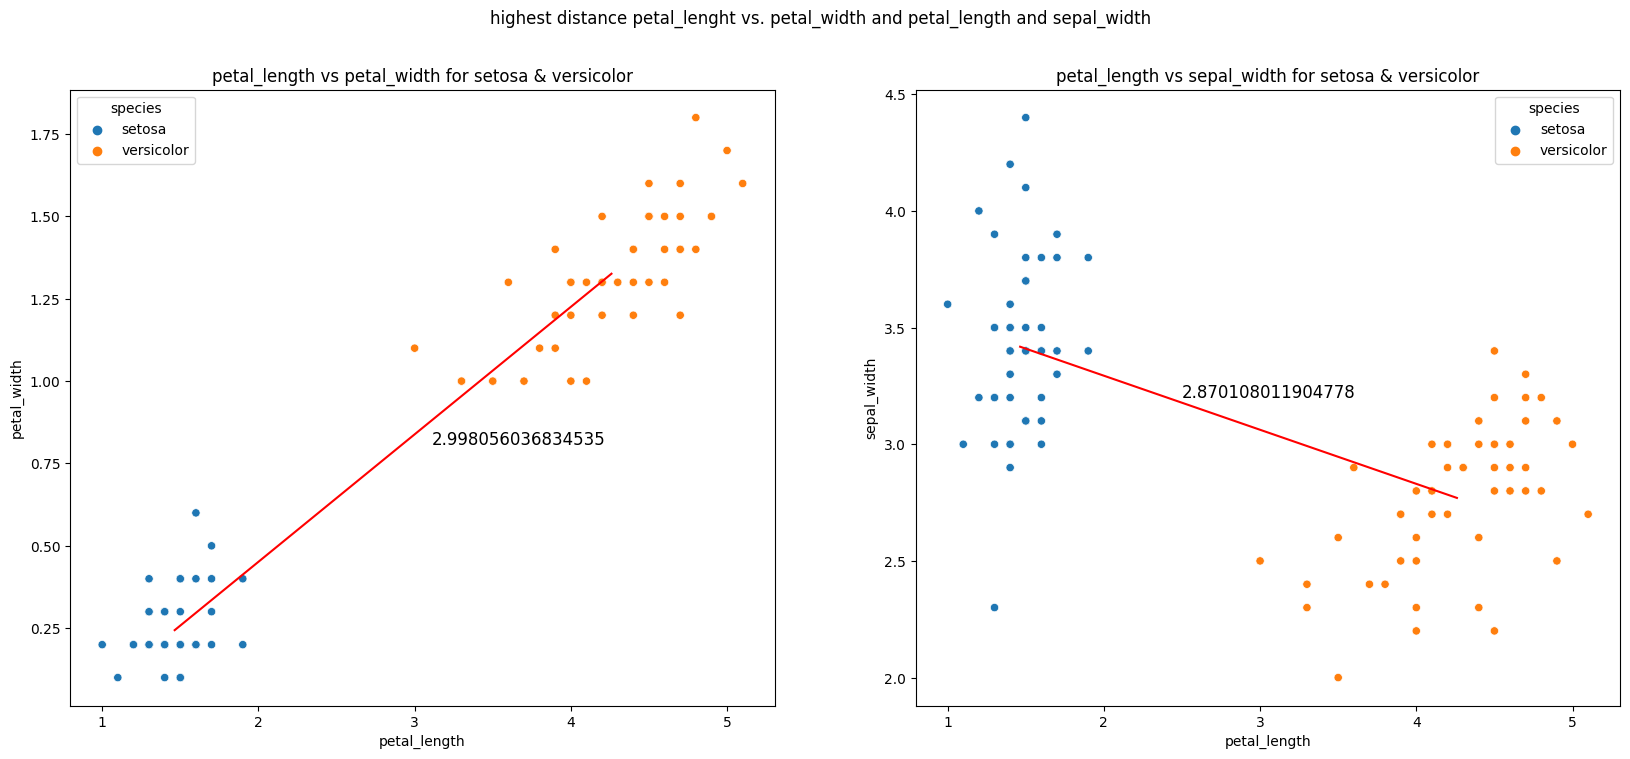

In [ ]:
plt.rcParams['figure.figsize'] = [20,8]

#finding coordinates of the means for petal width and petal length

setosa_length = np.array(setosa_versicolor[setosa_versicolor.species == 'setosa']['petal_length'])
setosa_width = np.array(setosa_versicolor[setosa_versicolor.species == 'setosa']['petal_width'])


versicolor_length = np.array(setosa_versicolor[setosa_versicolor.species == 'versicolor']['petal_length'])
versicolor_width = np.array(setosa_versicolor[setosa_versicolor.species == 'versicolor']['petal_width'])

x_cord_petal = [setosa_length.mean(), versicolor_length.mean()]
y_cord_petal = [setosa_width.mean(), versicolor_width.mean()]

# creating sublots

fig, axes = plt.subplots(1, 2)
fig.suptitle('highest distance petal_lenght vs. petal_width and petal_length and sepal_width')

# filling first sunplot with petal width and petal length data

sns.scatterplot(ax = axes[0], x = 'petal_length', y = 'petal_width', data = setosa_versicolor, hue = 'species', marker = 'o')
axes[0].set_title("petal_length vs petal_width for setosa & versicolor")

# drawing a line that connects means of setosa and versicolor

axes[0].plot(x_cord_petal, y_cord_petal, 'r')

# finding length between the means and printing it on the subplot

dist = math.hypot(x_cord_petal[0] - x_cord_petal[1],  y_cord_petal[0] -  y_cord_petal[1])
plt.text(-2.3, 3, dist, fontsize= 12)

#finding coordinates of the means of petal width and sepal length

setosa_sepal_width = np.array(setosa_versicolor[setosa_versicolor.species == 'setosa']['sepal_width'])
x_cord_petal_length = [setosa_length.mean(),  versicolor_length.mean()]

versicolor_sepal_width = np.array(setosa_versicolor[setosa_versicolor.species == 'versicolor']['sepal_width'])
y_cord_sepal_width = [ setosa_sepal_width.mean() ,versicolor_sepal_width.mean()]

# filling the second subplot

sns.scatterplot(ax = axes[1], x = 'petal_length', y = 'sepal_width', data = setosa_versicolor, hue = 'species', marker = 'o')
axes[1].set_title("petal_length vs sepal_width for setosa & versicolor")

# drawing the line between two means

axes[1].plot( x_cord_petal_length, y_cord_sepal_width, 'r')

# calculating distance beween two means

dist2 = math.hypot(x_cord_petal_length[0] - x_cord_petal_length[1], y_cord_sepal_width[0] - y_cord_sepal_width[1])
plt.text(2.5, 3.2, dist2, fontsize= 12)




Use seaborn's jointplot to show the regression line

Text(0.5, 1.0, 'JointPlot for only satosa species using petal_length and petal_width')

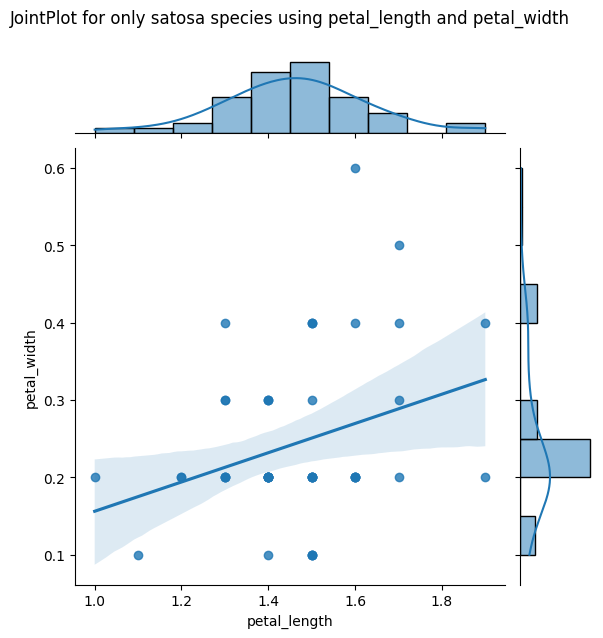

In [ ]:
sns.jointplot(x = 'petal_length', y = 'petal_width', data = setosa_versicolor[(setosa_versicolor.species == 'setosa')], kind = 'reg')
plt.title("JointPlot for only satosa species using petal_length and petal_width", pad = 90)

use the given regression code in the class to find the regression line for only setosa for petal_length and petal_width

Text(0, 0.5, 'petal_width')

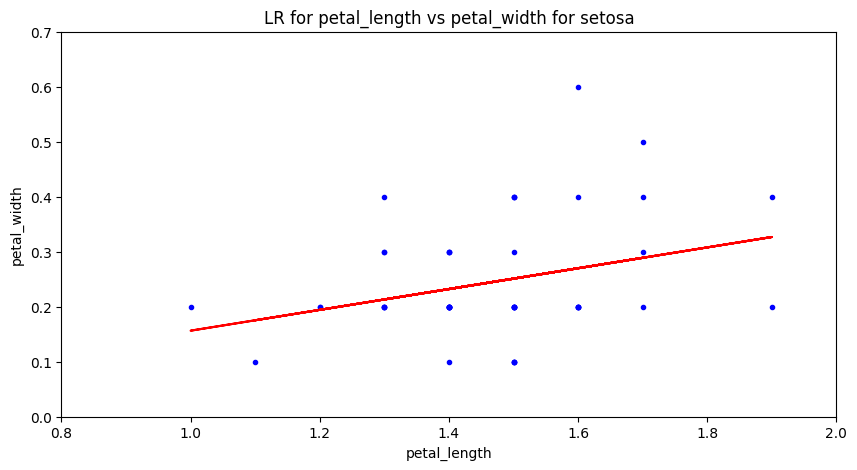

In [ ]:
plt.rcParams['figure.figsize'] = [10,5]

x = np.array(setosa_versicolor[setosa_versicolor.species == 'setosa']['petal_length'])
y = np.array(setosa_versicolor[setosa_versicolor.species == 'setosa']['petal_width'])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)

plt.plot(x,y, 'b.', x, poly1d_fn(x), 'r')
plt.xlim(0.8, 2)
plt.ylim(0, 0.7)
plt.title("LR for petal_length vs petal_width for setosa")
plt.xlabel("petal_length")
plt.ylabel("petal_width")


 
0.1893 x - 0.03308
1.1024945770065087


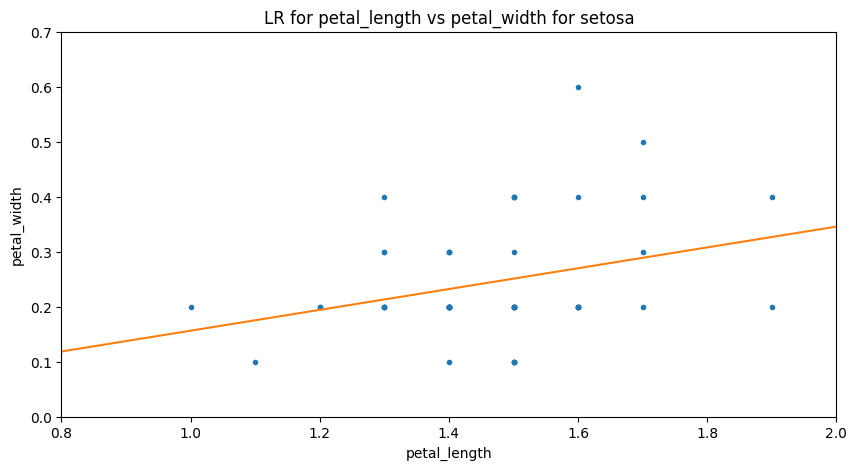

In [ ]:
plt.rcParams['figure.figsize'] = [10,5]

x = np.array(setosa_versicolor[setosa_versicolor.species == 'setosa']['petal_length'])
y = np.array(setosa_versicolor[setosa_versicolor.species == 'setosa']['petal_width'])
# print(y)
z = np.polyfit(x, y, 1)

# create polynomial
p = np.poly1d(z)
print(p)

# Extrapolation
x0=6
y0=np.polyval(p,x0)
plt.scatter(x0,y0)
print(y0)

# plot polynomial
xp = np.linspace(-2, 6, 100)
plt.xlim(0.8, 2)
plt.ylim(0, 0.7)
plt.plot(x, y, '.', xp, p(xp), '-')
plt.title("LR for petal_length vs petal_width for setosa")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()
